<a href="https://colab.research.google.com/github/simecek/dspracticum2020/blob/master/lecture_03/mnist_fashion_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


## Data

In [3]:
# load Fashion MNIST from Keras repo
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# add extra dimension (to have one channel)
x_train = x_train[:,:,:,None]
x_test = x_test[:,:,:,None]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [4]:
clothes_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Plotting

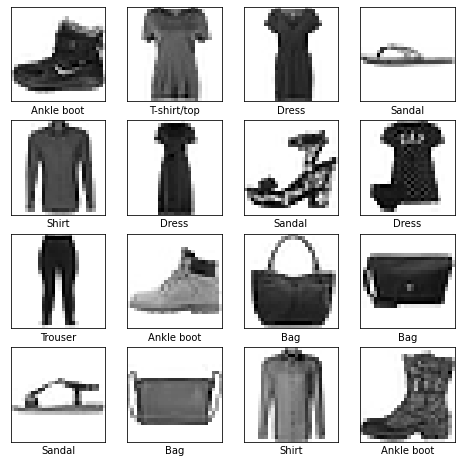

In [5]:
def plot_image(x, title = ""):
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x, cmap=plt.cm.binary)
  plt.xlabel(title)

plt.figure(figsize=(8,8))
for i in range(0, 160, 10):
  plt.subplot(4, 4, i // 10 + 1)
  plot_image(x_train[i].squeeze(), clothes_labels[y_train[i]])


## Dense Neural Network

In [6]:
# Normalize values from [0, 255] to [0, 1] interval
x_train = x_train / 255
x_test = x_test / 255

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

y_train.shape

(60000, 10)

In [8]:
dnn_model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
])

dnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = dnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.6111 - accuracy: 0.7905 - val_loss: 0.4639 - val_accuracy: 0.8377
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4092 - accuracy: 0.8580 - val_loss: 0.4284 - val_accuracy: 0.8451
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3699 - accuracy: 0.8684 - val_loss: 0.4207 - val_accuracy: 0.8540
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3446 - accuracy: 0.8768 - val_loss: 0.4153 - val_accuracy: 0.8447
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3188 - accuracy: 0.8864 - val_loss: 0.3584 - val_accuracy: 0.8708
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3049 - accuracy: 0.8887 - val_loss: 0.3610 - val_accuracy: 0.8723
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2918 - accuracy: 0.8938 - val_loss: 0.3524 - val_accuracy: 0.8736
Epoch 

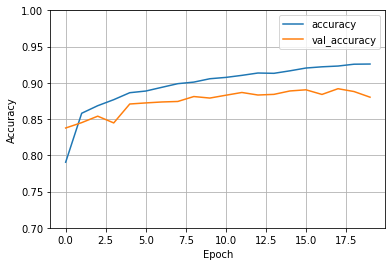

In [10]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

plot_loss(history, ylim=(0.7, 1))

## Convolutional Neural Network

In [11]:
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Dropout(0.5),
      layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [12]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 4s 15ms/step - loss: 0.6424 - accuracy: 0.7741 - val_loss: 0.3936 - val_accuracy: 0.8600
Epoch 2/20
235/235 [==============================] - 3s 14ms/step - loss: 0.4163 - accuracy: 0.8519 - val_loss: 0.3349 - val_accuracy: 0.8804
Epoch 3/20
235/235 [==============================] - 3s 15ms/step - loss: 0.3576 - accuracy: 0.8712 - val_loss: 0.3122 - val_accuracy: 0.8838
Epoch 4/20
235/235 [==============================] - 3s 15ms/step - loss: 0.3267 - accuracy: 0.8804 - val_loss: 0.2934 - val_accuracy: 0.8895
Epoch 5/20
235/235 [==============================] - 3s 15ms/step - loss: 0.2997 - accuracy: 0.8911 - val_loss: 0.2758 - val_accuracy: 0.8971
Epoch 6/20
235/235 [==============================] - 3s 14ms/step - loss: 0.2784 - accuracy: 0.8989 - val_loss: 0.2586 - val_accuracy: 0.9034
Epoch 7/20
235/235 [==============================] - 3s 14ms/step - loss: 0.2617 - accuracy: 0.9041 - val_loss: 0.2579 - val_accuracy: 0.9058

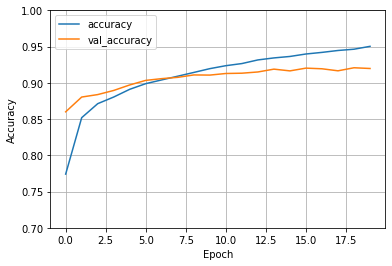

In [13]:
plot_loss(history, ylim=(0.7, 1))